### Models Metrics Analysis

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
models_df = pd.read_excel('Models/Crop_Models_Metrics.xlsx')
del models_df['Unnamed: 0']
models_df

,Models,Accuracy,Recall,F1_Score
0,DecisionTree,0.9862,0.9862,0.9864
1,GaussianNB,0.9959,0.9959,0.9959
2,RandomForest,0.9959,0.9959,0.9959
3,SupportVectorMachine,0.9780,0.9780,0.9778
4,WeightedClassifier,0.9972,0.9972,0.9972


In [39]:
models_df = pd.melt(models_df, id_vars="Models", var_name="Metrics", value_name="Value")
models_df

,Models,Metrics,Value
0,DecisionTree,Accuracy,0.9862
1,GaussianNB,Accuracy,0.9959
2,RandomForest,Accuracy,0.9959
3,SupportVectorMachine,Accuracy,0.9780
4,WeightedClassifier,Accuracy,0.9972
5,DecisionTree,Recall,0.9862
6,GaussianNB,Recall,0.9959
7,RandomForest,Recall,0.9959
8,SupportVectorMachine,Recall,0.9780
9,WeightedClassifier,Recall,0.9972


In [40]:
models_df['Value']= models_df['Value']*100
models_df = models_df.sort_values(by='Value')

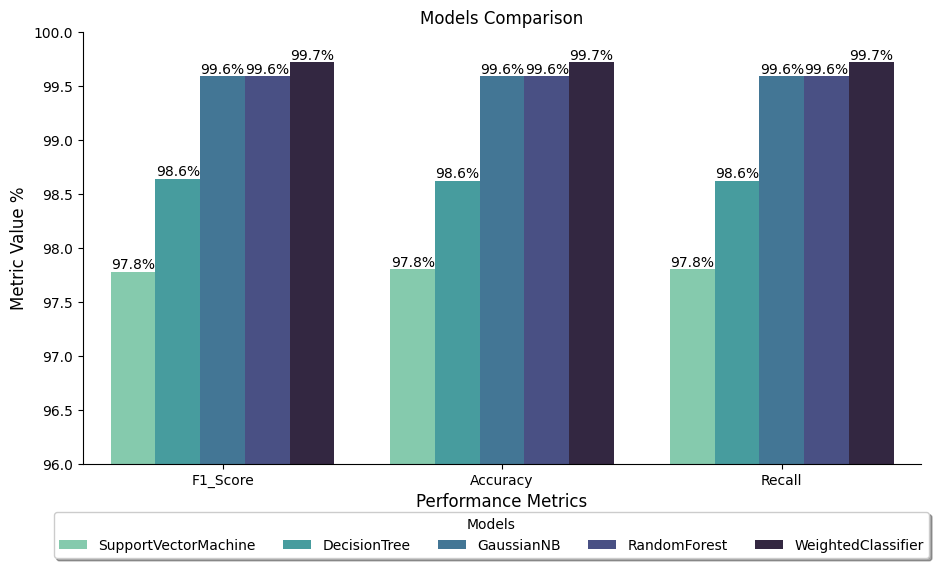

In [41]:
g = sns.catplot(x='Metrics', y='Value', data=models_df, kind='bar', hue='Models', palette='mako_r', legend_out=False)
g.fig.set_size_inches(10, 5)
sns.move_legend(g, "lower center", bbox_to_anchor=(0.55, -0.086), ncol=6, fontsize=10, title='Models', fancybox=True, shadow=True, frameon=True)
g.fig.subplots_adjust(top=0.98, right=0.98)

plt.title('Models Comparison')
plt.ylabel("Metric Value %", fontsize=12)
plt.xlabel("Performance Metrics", fontsize=12)
g.set(ylim=(96, 100))
#g.despine(left=True)

axe = g.axes[0][0]
axe.tick_params(axis='both', labelsize=10)

ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.savefig("Models Comparision Image")